In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

CURRENT_DIR = os.getcwd()

In [2]:
filenames = os.listdir(f"{CURRENT_DIR}/eval_results")
df_array = []
for filename in filenames:
    filepath = f"{CURRENT_DIR}/eval_results/{filename}"
    with open(filepath, "rb") as f:
        data_stored = pickle.load(f)
    ds = pd.DataFrame.from_dict(data_stored)
    ds["filename"] = filename
    df_array.append(ds)

ds = pd.concat(df_array)

In [3]:
filenames

['CA1_20251114_145626.pkl',
 'CA2_20251114_150115.pkl',
 'CA3_20251114_150148.pkl',
 'CA4_20251114_150236.pkl',
 'CA5_20251114_150330.pkl',
 'CA6_20251114_150406.pkl',
 'RL_RANDOM_TRAIN_20251114_141121.pkl']

In [4]:
map_dict={
    "CA1_20251114_145626.pkl": "CA1",
    "CA2_20251114_150115.pkl": "CA2",
    "CA3_20251114_150148.pkl": "CA3",
    "CA4_20251114_150236.pkl": "CA4",
    "CA5_20251114_150330.pkl": "CA5",
    "CA6_20251114_150406.pkl": "CA6",
    "RL_RANDOM_TRAIN_20251114_141121.pkl": "RL",
}

In [5]:
ds["filename"] = ds["filename"].map(map_dict)

Text(0, 0.5, 'Best Solution Value')

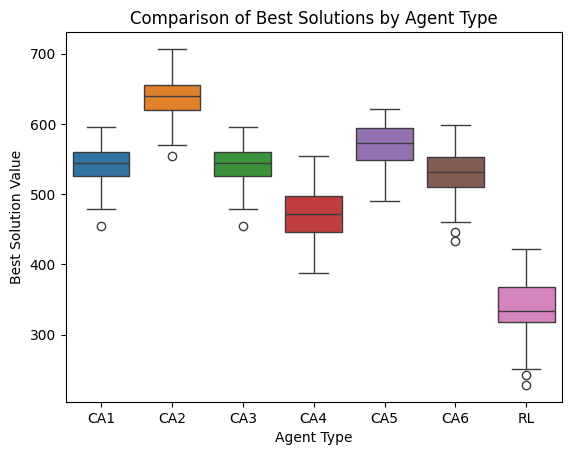

In [6]:
sns.boxplot(data=ds, x="filename", y="best_solution", hue="filename")
plt.title("Comparison of Best Solutions by Agent Type")
plt.xlabel("Agent Type")
plt.ylabel("Best Solution Value")

In [7]:
filt = ds["filename"] == "RL"
ds[filt]

,seed,best_solution,df,global_solution_history,fitness_trial_history,filename
0,0,256.904660,F CR MG best_soluti...,"[1.3265382084905475, 1.3265382084905475, 1.326...","[1.3265382084905475, 1.4550259002253725, 1.399...",RL
1,1,260.450756,F CR MG best_soluti...,"[1.5580251575553186, 1.5580251575553186, 1.524...","[1.5580251575553186, 1.6319206079637738, 1.524...",RL
2,2,360.378060,F CR MG best_soluti...,"[1.536346445293952, 1.364593923281481, 1.36459...","[1.536346445293952, 1.364593923281481, 1.57158...",RL
3,3,288.368103,F CR MG best_soluti...,"[1.361219012130808, 1.361219012130808, 1.36121...","[1.361219012130808, 1.5074501728506167, 1.4613...",RL
4,4,337.847005,F CR MG best_soluti...,"[1.4451878938303053, 1.4451878938303053, 1.418...","[1.4451878938303053, 1.4653815410848208, 1.418...",RL
...,...,...,...,...,...,...
95,95,298.678219,F CR MG best_soluti...,"[1.3260740656847751, 1.3260740656847751, 1.326...","[1.446872757824206, 1.5272421030512768, 1.3851...",RL
96,96,314.516045,F CR MG best_soluti...,"[1.349058411669213, 1.349058411669213, 1.34905...","[1.349058411669213, 1.3648619986105714, 1.3715...",RL
97,97,370.043291,F CR MG best_soluti...,"[1.6389564656708238, 1.5294768221777133, 1.475...","[1.6389564656708238, 1.5294768221777133, 1.475...",RL
98,98,421.425330,F CR MG best_solutio...,"[1.2941378382399793, 1.2941378382399793, 1.294...","[1.434919992862222, 1.3136152879318825, 1.4835...",RL


Text(0, 0.5, 'Global Solution Value')

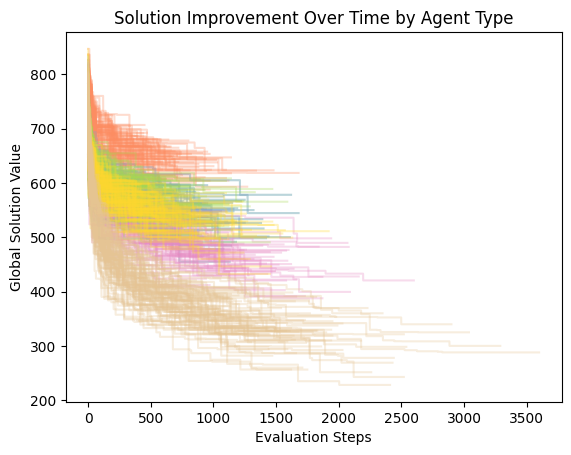

In [11]:
models = ds["filename"].unique()
# colors = sns.color_palette("husl", len(models))
colors = sns.color_palette("Set2", len(models))
for model, color in zip(models, colors):
    filt = ds["filename"] == model
    for history in ds[filt]["global_solution_history"]:
        sns.lineplot(data=np.array(history)*500, color=color, alpha=0.3)

plt.title("Solution Improvement Over Time by Agent Type")
plt.xlabel("Evaluation Steps")
plt.ylabel("Global Solution Value")
    